<a href="https://colab.research.google.com/github/SandarMyint77/Summer-2025-ECE-597-Group2/blob/main/gpa_years_experience_post.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression from scratch

The goal of this exercise is to implement the linear regression algorithm.
The dataset is about predicting salary given gpa and years of experience.
The steps to implement are as follows.  

1.	Read the data from a file (gpa_year_experience.csv)
2.	Scale the attributes
3.	Compute the error at each iteration and save the error values in vector
4.	Plot the error vector as a curve in the end
5.	Predict a new instance.
6.  Compare with SGDRegressor
7.  Create polynomial features and predict new instance   

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load data and show first 5 rows
data = pd.read_csv('https://raw.githubusercontent.com/thomouvic/SENG474/main/data/gpa_years_experience.csv')
data.head()

,gpa,years_of_experience,salary
0,70,1.0,50
1,80,2.0,55
2,65,2.0,45
3,70,2.5,60
4,65,2.7,58


In [3]:
# prepare data, split columns into X and y
# X should be a numpy array of shape (m, n), use .values to convert from dataframe to numpy array
# y should be a numpy array of shape (m,), use .values to convert from dataframe to numpy array

import numpy as np
# X: all input features (gpa and years_of_experience) as a numpy array of shape (m, n)
X = data[['gpa', 'years_of_experience']].values

# y: target variable (salary) as a numpy array of shape (m,)
y = data['salary'].values

# quick check of the shapes
X.shape, y.shape




((25, 2), (25,))

In [4]:
# extract m and n from X using X.shape[0] to get m and X.shape[1] to get n

m = X.shape[0]   # number of rows (samples)
n = X.shape[1]   # number of columns (features)

m, n


(25, 2)

In [5]:
# y should be a numpy array of shape (m, 1), use reshape(m, 1) to reshape y from (m,) to (m, 1)
y = y.reshape(m, 1)

# check the new shape
y.shape


(25, 1)

In [6]:
# normalize X using min-max scaler (sklearn.preprocessing.MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler

# create the scaler object
scaler = MinMaxScaler()

# fit on X and transform it to the scaled version
X = scaler.fit_transform(X)

# check new shape and first few rows
print(X.shape)
print(X[:5])


(25, 2)
[[0.3125  0.     ]
 [0.625   0.125  ]
 [0.15625 0.125  ]
 [0.3125  0.1875 ]
 [0.15625 0.2125 ]]


In [7]:
# add dummy feature to X using scikit-learn dummy feature (sklearn.preprocessing.add_dummy_feature)
from sklearn.preprocessing import add_dummy_feature

# add a column of ones as the first column in X
X = add_dummy_feature(X)

# check the new shape and a few rows
print(X.shape)
print(X[:5])


(25, 3)
[[1.      0.3125  0.     ]
 [1.      0.625   0.125  ]
 [1.      0.15625 0.125  ]
 [1.      0.3125  0.1875 ]
 [1.      0.15625 0.2125 ]]


In [8]:
# print shapes of X and y
# X should be (m, n+1) and y should be (m, 1)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (25, 3)
Shape of y: (25, 1)


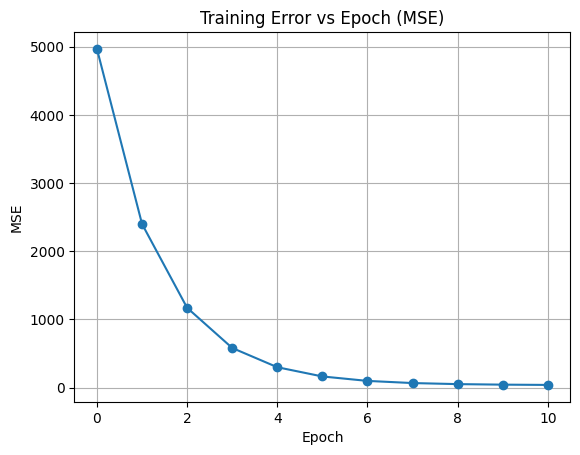

Final theta:
 [[44.69694899]
 [21.26803414]
 [25.80208124]]


In [9]:
eta = 0.1 # learning rate
n_epochs = 10
np.random.seed(42) # set random seed to 42 for reproducibility

# create theta, of shape (n+1, 1) and initialize it to random values using np.random.randn

E = [] # list to store errors at each epoch
# compute error for initial theta and append to E

# loop over n_epochs
# for each epoch: compute gradients, update theta, compute error, append error to E

# plot error vs epoch

# print final theta
import numpy as np
import matplotlib.pyplot as plt

eta = 0.1          # learning rate
n_epochs = 10
np.random.seed(42) # reproducibility

# create theta of shape (n+1, 1) and initialize randomly
theta = np.random.randn(X.shape[1], 1)

def mse(X, y, th):
    r = X @ th - y
    return np.mean(r**2)

E = []  # errors per epoch (MSE)

# compute error for initial theta and append to E
E.append(mse(X, y, theta))

# loop over n_epochs: compute gradients, update theta, log error
m = X.shape[0]
for epoch in range(n_epochs):
    residual = X @ theta - y                  # (m,1)
    gradients = (2/m) * (X.T @ residual)      # (n+1,1)
    theta = theta - eta * gradients
    E.append(mse(X, y, theta))

# plot error vs epoch
plt.plot(range(len(E)), E, marker='o')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Training Error vs Epoch (MSE)")
plt.grid(True)
plt.show()

# print final theta
print("Final theta:\n", theta)


In [11]:
# let's predict the salary for a person who has gpa=70 and years_of_experience=3.
# create a numpy array x of shape (1, 2) with these values
x = np.array([[70, 3]])
# scale features using the same scaler we used earlier
x_scaled = scaler.transform(x)
# insert dummy feature using dummy feature function
x_ready = add_dummy_feature(x_scaled)
# Predict salary of x
x = np.array([[70,3]])
predicted_salary = x_ready @ theta
print("Predicted salary:", float(predicted_salary))

Predicted salary: 57.7937299648853


/tmp/ipython-input-3393825150.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted salary:", float(predicted_salary))


In [12]:
# Let's compare with scikit-learn's SGDRegressor
# use SGDRegressor from scikit-learn to fit the data
# use max_iter=1000, eta0=0.1, random_state=42
from sklearn.linear_model import SGDRegressor

# y must be 1-D for sklearn estimators
y_flat = y.ravel()

# Option 1: use your current X (already has dummy column)
sgd = SGDRegressor(
    loss='squared_error',
    learning_rate='constant',
    eta0=0.1,
    max_iter=1000,
    random_state=42,
    fit_intercept=False  # because X already has the dummy/bias feature
)

sgd.fit(X, y_flat)

print("SGDRegressor coefficients (theta):", sgd.coef_)

# predict the same sample you prepared earlier
sgd_pred = sgd.predict(x_ready)   # x_ready also contains the dummy feature
print("SGDRegressor prediction:", sgd_pred[0])


SGDRegressor coefficients (theta): [47.89712373  8.46603425 37.12746914]
SGDRegressor prediction: 59.82462671224613


In [13]:
# predict salary of x using sgd
# predict salary of x using the trained SGDRegressor
sgd_pred_salary = sgd.predict(x_ready)   # x_ready already scaled & has dummy feature
print("Predicted salary with SGDRegressor:", sgd_pred_salary[0])


Predicted salary with SGDRegressor: 59.82462671224613


In [14]:
# create polynomial features of degree 2 using scikit-learn PolynomialFeatures
# create X_poly using fit_transform
# create x_poly using transform
# fit the data using SGDRegressor
# predict salary of x using sgd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor

# 1) Base features: scale the two original features (no dummy here)
X_base = scaler.transform(data[['gpa', 'years_of_experience']].values)
x_base = scaler.transform(np.array([[70, 3]]))

# 2) Create polynomial features (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_base)  # fit on training data, transform it
x_poly = poly.transform(x_base)      # transform the new point the same way

# 3) Fit SGDRegressor on the polynomial features
sgd_poly = SGDRegressor(
    loss='squared_error',
    learning_rate='constant',
    eta0=0.1,
    max_iter=1000,
    random_state=42,
    fit_intercept=True     # intercept is learned; no dummy column used here
)
sgd_poly.fit(X_poly, y.ravel())

# 4) Predict salary of x
pred_salary_poly = sgd_poly.predict(x_poly)[0]
print("Predicted salary with polynomial (deg=2) + SGDRegressor:", pred_salary_poly)


Predicted salary with polynomial (deg=2) + SGDRegressor: 59.54867684463215
